<a href="https://colab.research.google.com/github/wallik2/PoissonProcess/blob/master/Poisson_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<fieldset>

**This notebook was dedicated for the student who are following the lecture Poisson process, and want to learn to code from scratch, so you can get the automation sense of creating them as automatic poisson process machine**

                                 -Saran Pannasuriyaporn-

Let's start !!!

![](http://24.media.tumblr.com/2a36ba2a3016572f698ec19ad0051a39/tumblr_mrg3g8Nkbx1swdfc0o1_500.gif)

# Arrival count

- like the binomial distribution, but N is infinitely high, and p is infinitely small

- λ = np

- This mean the rate of approach to infinity of both n and p are the same, then λ is 1

- p as the probability of success for the extremely small interval (δ)
- n as the number of increment (τ/δ)

In [ ]:
# The very small interval (δ) [the more small, the better precisely it is]

δ = 1e-3

# arrival rate (intense rate per τ)

#given 120 ppl comes in 60 minutes
#given τ = 60 minute

λ = 120/60
τ = 60

In [ ]:
# Expected value of number of arrival per δ

print(f'the expected value of the number of arrival from (0,δ] : {δ*λ}')
print(f'the variance of the number of arrival from (0,δ] : {δ*λ}')

the expected value of the number of arrival from (0,δ] : 0.002
the variance of the number of arrival from (0,δ] : 0.002


In [ ]:
p = δ*λ

m = int(τ/δ)



---



In [ ]:
from numpy import random, where

In [ ]:
random.seed(42)

In [ ]:
simulatation = random.binomial(1,p,m)

In [ ]:
count_one = where(simulatation == 1)[0].shape[0]

count_zero = m-count_one

In [ ]:
# Estimated of probability of count = one

count_one/m

0.0018833333333333334

In [ ]:
# True probability of count = one

δ

0.001



---



In [ ]:
# Simulation

print(f'the total number of arrival : {count_one}')

the total number of arrival : 113




---



Example 1 :

Warning : Try high k is not recommended, due to the overflow of factorial(k)

In [ ]:
from scipy.special import factorial 
from numpy import e

In [ ]:
# Ex 1 :The probability of getting 6 arrival in 15 minutes
# Given the number of arrival follows Poisson distribution

k, t = 6, 15

In [ ]:
# Poisson distribution given k,t
def p(k,t):
  return (  ( e**(-λ*t) *  (λ*t)**k  )/ factorial(k)  )

In [ ]:
# Solution :

print(f'the probability that there will have 6 arrivals in the next 15 minute is \n{p(k,t)}')

the probability that there will have 6 arrivals in the next 15 minute is 
9.474593255950692e-08




---



Example 2 :

In [ ]:
# Ex 2 : The probability that in the next 15 minute will have 6 arrival, and the next 30 minutes will have 15 arrival 
# These two events are overlapping

k1, t1 = 6, 15
k2, t2 = 15, 30

In [ ]:
# we prevenet overlapping by making the event 2 independent to event 1 by replace the event 2 by the difference between them

prob = p(k1,t1) * p(k2-k1,t2-t1)

In [ ]:
print(f'The probability that in the next 15 minute will have 6 arrival, and the next 30 minutes will have 15 arrival is \n {prob}')



The probability that in the next 15 minute will have 6 arrival, and the next 30 minutes will have 15 arrival is 
 4.808995573162839e-13




---



# Interarrival time

- Interarrival time is the length of time between the occur of the current arrival and the next arrival

- unlike the count of Arrival which is poisson distributed, Inter-arrival time is exponentially distributed.. 

- The exponential distribution is the same idea as the geometric distribution, but it's continuous version of Geometric

- This means the exponential distribution indicates the pdf of until the k is 1 (success)

<details>
<summary><b>Geometric vs Exponential distribution visualization</b></summary>

![](https://github.com/wallik2/PoissonProcess/blob/master/Picture/GeoExpo.png?raw=true)

red indicates pdf of *Exponential distribution*  while teal indicates pmf of *Geometric distribution*

</details>


- The pdf of exponential distribution for interarrival time is derived from Erlang distribution with k=1

<details>
<summary><b>Erlang distribution visualization</b></summary>

![](https://github.com/wallik2/PoissonProcess/blob/master/Picture/erlang%20distribution.png?raw=true)

λ instead of μ for this case
</details>

- The input for that exp. function is time (y)

## The probability function of Interarrival time

In [ ]:
# Given the same parameter from the arrival count


# The probability of Interarrival time function

def f(y):
  # y as time
  return λ*e**(-λ*y)

Note : In this case : λ = 120/60 = 2

In [ ]:
print(f'The chance that the new arrival will happen in a next half minute minute is \n{f(0.5)}')

The chance that the new arrival will happen in a next half minute minute is 
0.7357588823428847


In [ ]:
print(f'The chance that the new arrival will happen in the next minute is \n{f(1)}')

The chance that the new arrival will happen in the next minute is 
0.2706705664732254


In [ ]:
print(f'The chance that the new arrival will happen in the next 1.5 minute is \n{f(1.5)}')

The chance that the new arrival will happen in the next 1.5 minute is 
0.0995741367357279


In [ ]:
print(f'The chance that the new arrival will happen in the next 2 minute is \n{f(2)}')

The chance that the new arrival will happen in the next 2 minute is 
0.03663127777746837


In [ ]:
print(f'The chance that the new arrival will happen in the next 1 hour is \n{f(60)}')

The chance that the new arrival will happen in the next 1 hour is 
1.5335296147444098e-52




---



## The expected value and variance of Inter-arrival time

- Since the interarrival time is an exponential random variable, so the expected valeu and variance is

In [ ]:
def E(λ):
  return 1/λ

def var(λ):
  return 1/λ**2

In [ ]:
print(f'The expected value of Inter Arrival time is \n {E(λ)}')

print(f'The variance of Inter Arrival time \n {var(λ)}')

The expected value of Inter Arrival time is 
 0.5
The variance of Inter Arrival time 
 0.25




---



# Merge & Splitting the poisson processes

In [ ]:
# There are 2 processes in this case

λ_1 , λ_2 = 2, 5


In [ ]:
p_1, p_2 = (λ_1 * δ) , (λ_2 * δ)

In [ ]:
process_1 = random.binomial(1,p_1,m)
process_2 = random.binomial(1,p_2,m)

merged_process = (process_1 | process_2)

In [ ]:
#@title Arrival count function ( arrival_count(process) ) {display-mode: "form"}

def arrival_count(process):
  return len(where(process == 1)[0] * δ)

In [ ]:
#@title Plot function (plot1d()) {display-mode: "form"}
import matplotlib.pyplot as plt, matplotlib.cbook as cb
import warnings
warnings.filterwarnings("ignore",category=cb.mplDeprecation)


def plot1d(process,process_name):
# set up the figure

  
  fig = plt.figure(figsize=(21, 0.5), dpi=80)
  ax = fig.add_subplot(111)
  ax.set_xlim(0,τ)
  ax.set_ylim(0,τ)

  ax.set_title(process_name,fontsize=20)

# draw lines
  xmin = 0
  xmax = τ
  
  y = [5] * len(where(process == 1)[0] * δ)
  y_pop = 5
  height = 1

  plt.hlines(y_pop, xmin, xmax)
  plt.vlines(xmin, y_pop - height / 2., y_pop + height / 2.)
  plt.vlines(xmax, y_pop - height / 2., y_pop + height / 2.)

# draw a point on the line
  px = where(process == 1)[0] * δ
  plt.plot(px, y, 'ro', ms = 15, mfc = 'r',markersize=1)


# add numbers
  plt.text(xmin - 0.1, y_pop, '0', horizontalalignment='right')
  plt.text(xmax + 0.1, y_pop, str(τ), horizontalalignment='left')
  #plt.axis('off')
  ax.set_frame_on(False)
  ax.get_xaxis().tick_bottom()
  ax.axes.get_yaxis().set_visible(False)

  plt.show()

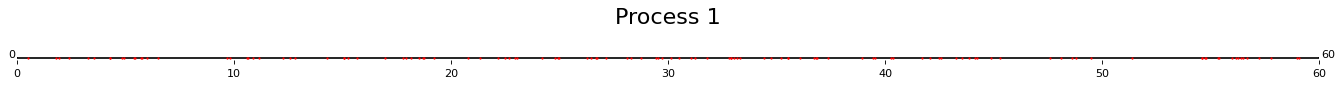

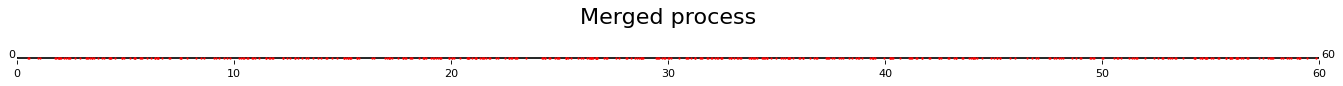

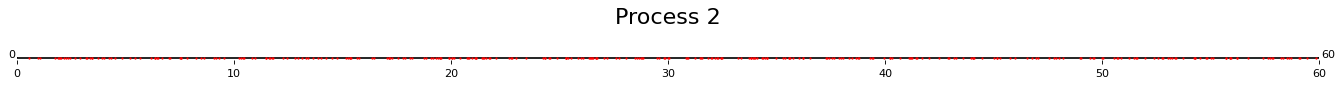

In [ ]:
#@title Plot the Processes {display-mode: "form"}



plot1d(process_1,'Process 1')
plot1d(merged_process,'Merged process')
plot1d(process_2,'Process 2')

In [ ]:
#@title Report the Processes {display-mode: "form"}
print('='*60)
print(f'|             out of {m} arrival counts                   |')
print('='*60)
print(f'     Process 1 has a total number of arrival : {arrival_count(process_1)}')
print(f'     Process 2 has a total number of arrival : {arrival_count(process_2)}')
print(f'     Merged process has a total number of arrival : {arrival_count(merged_process)}')
print('='*60)

|             out of 60000 arrival counts                   |
     Process 1 has a total number of arrival : 119
     Process 2 has a total number of arrival : 317
     Merged process has a total number of arrival : 436


.#Help : I try to figure out how to plot blue mark dot for Process 2, so we can clearly see which process is in this merge process



---



In [ ]:
# since the merged process is still a poisson process, so 
# we are interested at the chance that the arrival event in merged process belong to which process

λ_merged = λ_1 + λ_2

print(f'The probability that the arrival belong to process 1 in the merged process : {λ_1/λ_merged}')
print(f'The probability that the arrival belong to process 1 in the merged process : {λ_2/λ_merged}')

The probability that the arrival belong to process 1 in the merged process : 0.2857142857142857
The probability that the arrival belong to process 1 in the merged process : 0.7142857142857143
